In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
#xgboost - loading problem - from github 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os


In [4]:
# Load dataset
df = pd.read_csv('stroop_test.csv')
print("Original Dataset:")
print(df.head())
df.describe()

Original Dataset:
   Participant  Accuracy(%)  ReactionTime(min)
0            1           36               0.48
1            2           75               2.33
2            3           89               2.42
3            4           69               1.32
4            5           56               0.32


,Participant,Accuracy(%),ReactionTime(min)
count,50.00000,50.000000,50.000000
mean,25.50000,65.440000,1.508200
std,14.57738,20.814202,0.793853
min,1.00000,31.000000,0.200000
25%,13.25000,49.000000,1.072500
50%,25.50000,67.500000,1.465000
75%,37.75000,85.250000,2.282500
max,50.00000,98.000000,3.000000


In [ ]:
#labeling-
def label_data(row):
    """Classify based on accuracy and reaction time thresholds"""
    if row['Accuracy(%)'] >= 70 and row['ReactionTime(min)'] <= 1.5:
        return 0  # Low cognitive interference
    return 1       # High cognitive interference

df['Interference'] = df.apply(label_data, axis=1)
print("\nLabeled Dataset:")
print(df.head())
print("\nClass Distribution:")
print(df['Interference'].value_counts())


Labeled Dataset:
   Participant  Accuracy(%)  ReactionTime(min)  Interference
0            1           36               0.48             1
1            2           75               2.33             1
2            3           89               2.42             1
3            4           69               1.32             1
4            5           56               0.32             1

Class Distribution:
Interference
1    48
0     2
Name: count, dtype: int64


In [7]:
# Statistical Features
stats_features = {
    '1. Accuracy Mean': df['Accuracy(%)'].mean(),
    '2. Reaction Time Mean': df['ReactionTime(min)'].mean(),
    '3. Accuracy Std Dev': df['Accuracy(%)'].std(),
    '4. Reaction Time Std Dev': df['ReactionTime(min)'].std(),
    '5. Accuracy-Reaction Correlation': df['Accuracy(%)'].corr(df['ReactionTime(min)']),
    '6. Min Accuracy': df['Accuracy(%)'].min(),
    '7. Max Accuracy': df['Accuracy(%)'].max(),
    '8. Min Reaction Time': df['ReactionTime(min)'].min(),
    '9. Max Reaction Time': df['ReactionTime(min)'].max(),
    '10. Accuracy Skewness': df['Accuracy(%)'].skew(),
    '11. Reaction Time Kurtosis': df['ReactionTime(min)'].kurtosis(),
    '12. Low Interference Percentage': (df['Interference'] == 0).mean() * 100
}

print("\nStatistical Features:")
for feature, value in stats_features.items():
    print(f"{feature}: {value:.4f}")


Statistical Features:
1. Accuracy Mean: 65.4400
2. Reaction Time Mean: 1.5082
3. Accuracy Std Dev: 20.8142
4. Reaction Time Std Dev: 0.7939
5. Accuracy-Reaction Correlation: 0.8794
6. Min Accuracy: 31.0000
7. Max Accuracy: 98.0000
8. Min Reaction Time: 0.2000
9. Max Reaction Time: 3.0000
10. Accuracy Skewness: -0.1347
11. Reaction Time Kurtosis: -0.9805
12. Low Interference Percentage: 4.0000


In [8]:
# Data Preparation
X = df[['Accuracy(%)', 'ReactionTime(min)']]
y = df['Interference']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Feature Scaling (for neural network)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


NEURAL NETWORK


/Users/rokibulislam/Documents/GitHub/Rokibul_2111088642_CSE445/venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Neural Network Results:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



/Users/rokibulislam/Documents/GitHub/Rokibul_2111088642_CSE445/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


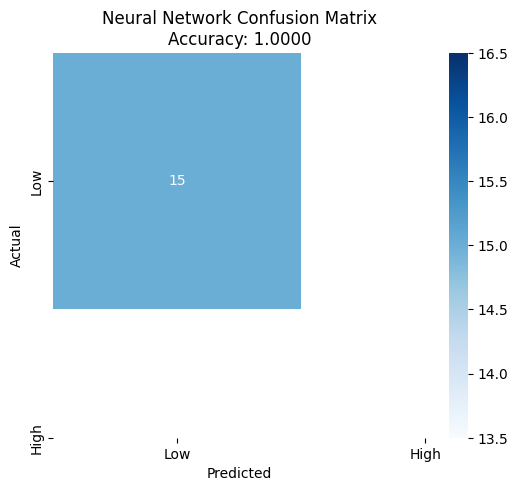

In [ ]:
#Neural Network
print("\n" + "="*50)
print("NEURAL NETWORK")
print("="*50)

# Create model
nn_model = Sequential([
    Dense(16, activation='relu', input_shape=(2,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
nn_model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train model
history = nn_model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=8,
    validation_split=0.2,
    verbose=0
)

# Evaluate model
nn_probs = nn_model.predict(X_test_scaled)
nn_pred = (nn_probs > 0.5).astype(int)
nn_acc = accuracy_score(y_test, nn_pred)

# Print results
print("\nNeural Network Results:")
print(f"Accuracy: {nn_acc:.4f}")
print("Classification Report:")
print(classification_report(y_test, nn_pred))

# Confusion Matrix
nn_cm = confusion_matrix(y_test, nn_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low', 'High'], 
            yticklabels=['Low', 'High'])
plt.title(f'Neural Network Confusion Matrix\nAccuracy: {nn_acc:.4f}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('neural_network_cm.png')
plt.show()



RANDOM FOREST

Random Forest Results:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



/Users/rokibulislam/Documents/GitHub/Rokibul_2111088642_CSE445/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


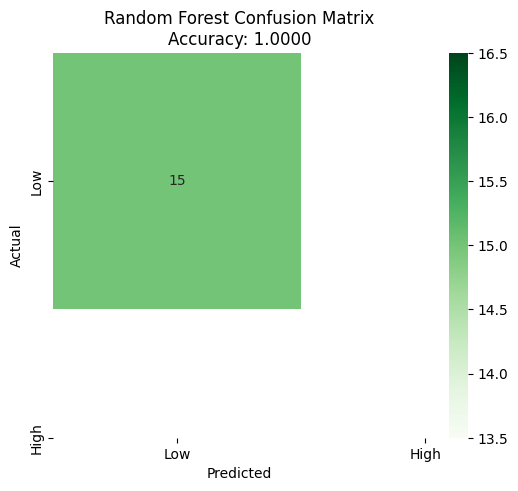

/var/folders/rw/78tm6n2d2856gsqb273p1x2h0000gn/T/ipykernel_75688/36715985.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importance, y=features, palette='viridis')


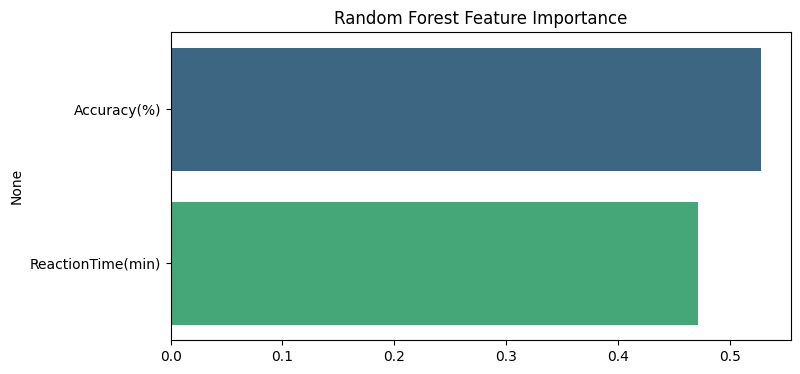

In [13]:
# Random Forest
print("\n" + "="*50)
print("RANDOM FOREST")
print("="*50)

# Create and train model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_split=5,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Evaluate model
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

# Print results
print("\nRandom Forest Results:")
print(f"Accuracy: {rf_acc:.4f}")
print("Classification Report:")
print(classification_report(y_test, rf_pred))

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Low', 'High'], 
            yticklabels=['Low', 'High'])
plt.title(f'Random Forest Confusion Matrix\nAccuracy: {rf_acc:.4f}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('random_forest_cm.png')
plt.show()

# Feature importance
rf_importance = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 4))
sns.barplot(x=rf_importance, y=features, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.savefig('rf_feature_importance.png')
plt.show()
